# Model Training

In [1]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import joblib

from sklearn.linear_model import Lasso

from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    r2_score
)

pd.pandas.set_option('display.max_columns', None)

In [2]:
# set seed for reproducibility
SEED = 20240626
SRC_PATH = Path.joinpath(Path.cwd().parent, 'src')
DATA_PATH = Path.joinpath(Path.cwd().parent, 'data')
MODULE_PATH = Path.joinpath(Path.cwd().parent, 'module')

In [3]:
# load data
X_train = pd.read_csv(os.path.join(DATA_PATH, 'data_model/xtrain.csv'))
X_test = pd.read_csv(os.path.join(DATA_PATH, 'data_model/xtest.csv'))
y_train = pd.read_csv(os.path.join(DATA_PATH, 'data_model/ytrain.csv'))
y_test = pd.read_csv(os.path.join(DATA_PATH, 'data_model/ytest.csv'))

In [4]:
# load pre-selected features
features = pd.read_csv(os.path.join(SRC_PATH, 'selected_features.csv'))
features = features['0'].tolist()

In [5]:
# reduce feature space
X_train = X_train[features]
X_test = X_test[features]

In [6]:
# now train a Lasso reg
lin_model = Lasso(alpha=1e-3, random_state=SEED)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=20240626)

In [8]:
# Evaluate:
# for this need to re-scale to original scale, undoing the log transform
# -- Train metrics -- #
pred = lin_model.predict(X_train)
train_mse = mean_squared_error(np.exp(y_train), np.exp(pred)) 
train_rmse = root_mean_squared_error(np.exp(y_train), np.exp(pred))
train_r2 = r2_score(np.exp(y_train), np.exp(pred))

print("Train MSE", train_mse)
print("Train RMSE", train_rmse)
print("Train R2", train_r2)
print()

# -- Test metrics -- #
pred = lin_model.predict(X_test)
test_mse = mean_squared_error(np.exp(y_test), np.exp(pred)) 
test_rmse = root_mean_squared_error(np.exp(y_test), np.exp(pred))
test_r2 = r2_score(np.exp(y_test), np.exp(pred))

print("test MSE", test_mse)
print("test RMSE", test_rmse)
print("test R2", test_r2)
print()

Train MSE 742092825.2989538
Train RMSE 27241.380752431654
Train R2 0.8834856562226507

test MSE 1296940890.4644563
test RMSE 36013.06555216393
test R2 0.7740704621735339



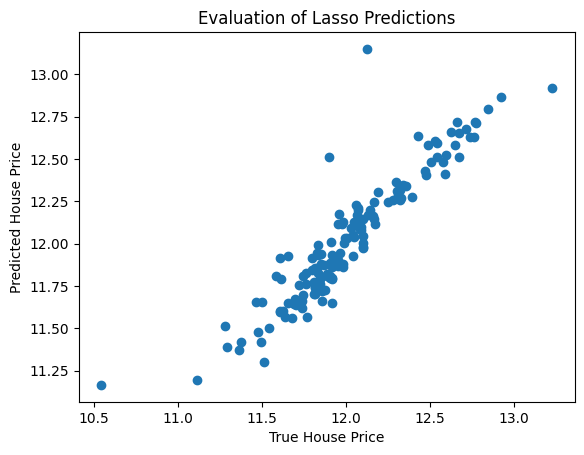

In [10]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')
plt.show()

## Validation of Linear model assumptions

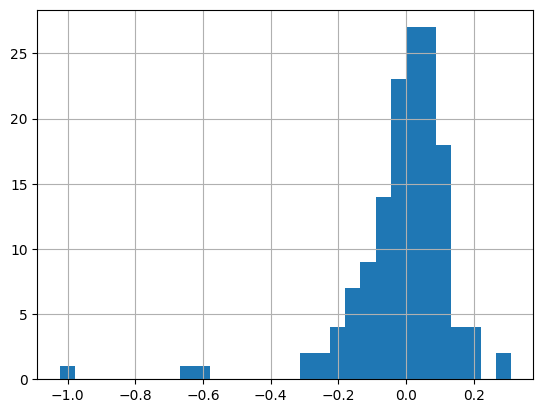

In [12]:
y_test.reset_index(drop=True, inplace=True)
preds = lin_model.predict(X_test)

# get errros and see if it has an aprox of normal dist
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

## Feature Importance

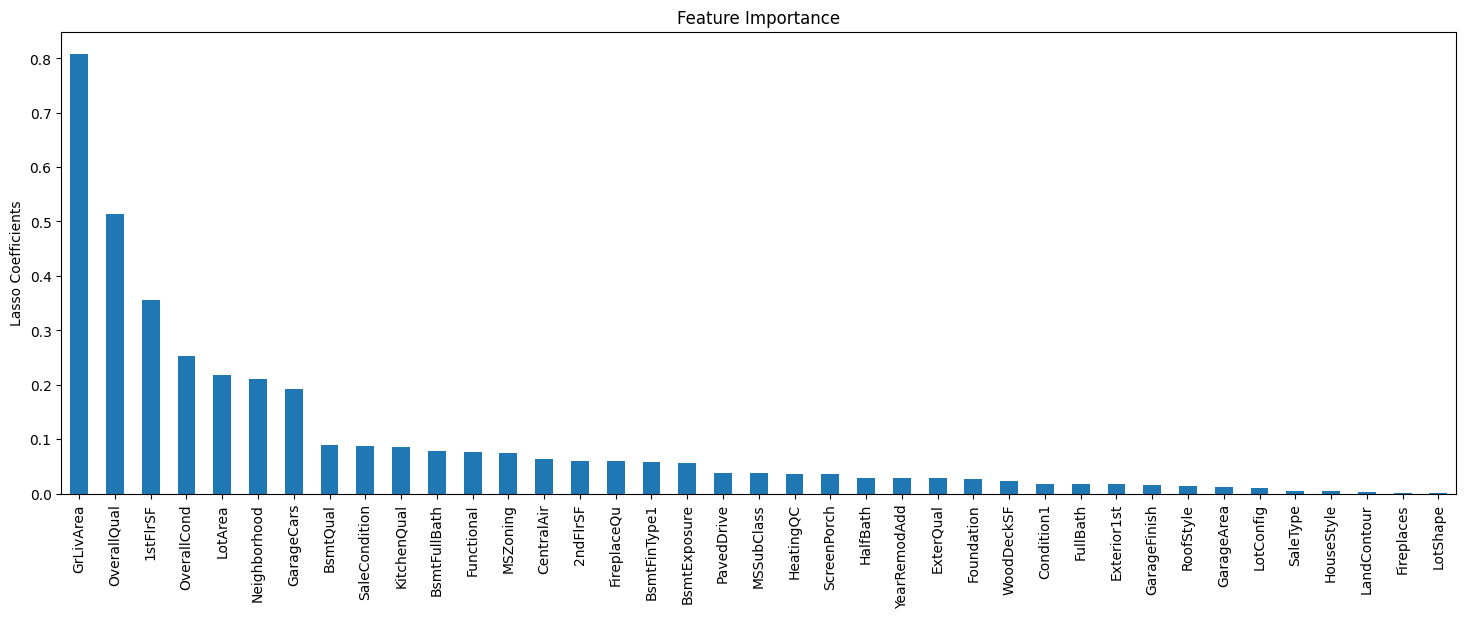

In [13]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')
plt.show()

## Save model

In [14]:
joblib.dump(lin_model, Path.joinpath(SRC_PATH, 'models/linear_regression.joblib'))

['/Users/juandiegogallegoquiceno/Desktop/PersonalProjects/mlops/deployment-ml-models/src/models/linear_regression.joblib']